In [102]:
import random
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
np.random.seed(0)

In [5]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [12]:
np.unique(y)

array([0, 1, 2, 3])

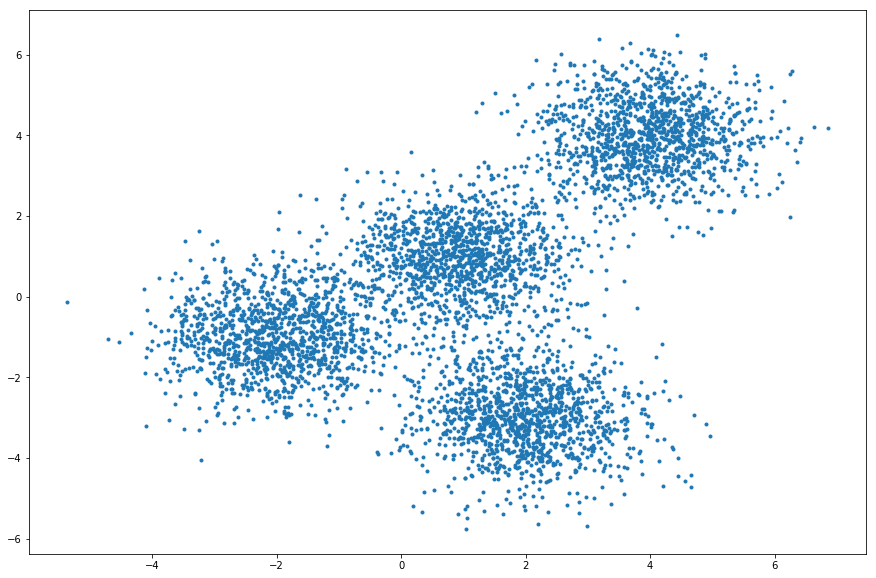

In [6]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [14]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [15]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
k_means_labels = k_means.labels_

In [19]:
k_means_cluster_centers = k_means.cluster_centers_

In [22]:
set(k_means_labels)

{0, 1, 2, 3}

In [23]:
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

# Customer Segmentation

In [53]:
df = pd.read_csv('Cust_Segmentation.csv')

In [54]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [57]:
df['Address'].nunique()

32

In [56]:
df.shape

(850, 10)

In [70]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [71]:
from sklearn.preprocessing import StandardScaler

In [83]:
type(df.values)

numpy.ndarray

In [84]:
type(np.nan_to_num(X))

numpy.ndarray

In [87]:
df.drop('Address',axis=1,inplace=True)

In [88]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [89]:
X = df.values[:,1:]

In [90]:
X = np.nan_to_num(X)

In [94]:
cluster_dataset = StandardScaler().fit_transform(X)

In [95]:
type(cluster_dataset)

numpy.ndarray

In [97]:
num_clusters=3
k_means = KMeans(init = 'k-means++',n_clusters=num_clusters,n_init=12)

In [98]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [99]:
df['label'] = k_means.labels_

In [100]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,label
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [109]:
area = np.pi * (X[:, 1])**2  
area

array([12.56637061,  3.14159265, 12.56637061, 12.56637061,  3.14159265,
        3.14159265, 12.56637061, 28.27433388,  3.14159265, 28.27433388,
       28.27433388, 12.56637061,  3.14159265,  3.14159265, 28.27433388,
        3.14159265,  3.14159265, 50.26548246,  3.14159265,  3.14159265,
       12.56637061, 28.27433388, 28.27433388,  3.14159265, 50.26548246,
        3.14159265,  3.14159265,  3.14159265, 12.56637061, 12.56637061,
       28.27433388, 12.56637061, 12.56637061, 28.27433388,  3.14159265,
       12.56637061, 28.27433388,  3.14159265,  3.14159265, 28.27433388,
        3.14159265, 28.27433388, 12.56637061, 78.53981634,  3.14159265,
       28.27433388,  3.14159265,  3.14159265,  3.14159265, 12.56637061,
        3.14159265,  3.14159265,  3.14159265,  3.14159265, 28.27433388,
        3.14159265,  3.14159265, 28.27433388,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265, 12.56637061, 12.56637061,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14

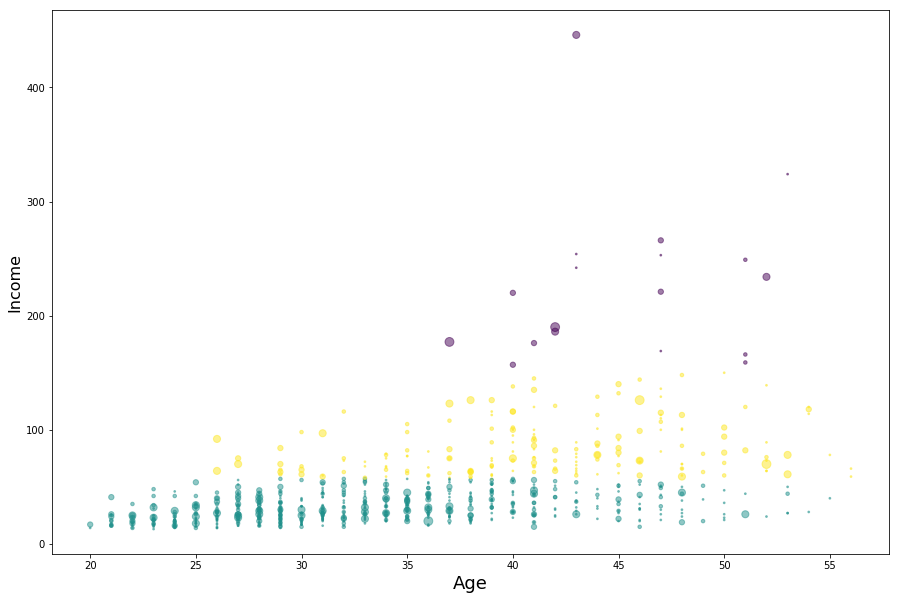

In [107]:
labels = k_means.labels_


plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()
